**1. Loading the dataset**

In [ ]:
import pandas as pd

# GitHub raw URL
url = 'https://raw.githubusercontent.com/abuthahir17/CODSOFT_INTERNSHIP/main/Titanic-Dataset.csv.xlsx'

# Read Excel file
data = pd.read_excel(url)

# Display top rows (First 5 rows)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2. Data Inspection**

2.1. Checking Data Types

In [ ]:
print("Data Types:\n\n" ,data.dtypes)

Data Types:

 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


 2.2. Checking Dataset Shape

In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (891, 12)


 2.3. Describing the Dataset

In [ ]:
print("Describe the Dataset \n\n" ,data.describe())

Describe the Dataset 

        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


**3. Handling Missing Values**

3.1. Initial Check for Missing Values

In [ ]:
print("\nMissing values:\n\n", data.isnull().sum())


Missing values:

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


3.2. Filling Missing 'Embarked' Values

In [ ]:
#data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)      #it gives future warning for inplace=True
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

3.3. Re-checking Missing Values (after Embarked imputation)

In [ ]:
print("\nAgain Check Missing values:\n\n", data.isnull().sum())
#Missing value in Embarked is 0


Again Check Missing values:

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


3.4 Filling Missing 'Age' Values

In [ ]:
# Fill missing age using median by Pclass and Sex group
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

3.5 Re-checking Missing Values (after Age imputation)

In [ ]:
print("\nAgain Check Missing values:\n\n", data.isnull().sum())
#Missing value in Age is 0


Again Check Missing values:

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


3.6 Dropping 'Cabin' Column

In [ ]:
# Drop Cabin column because too many missing values
data.drop(columns=['Cabin'], inplace=True)
print("Preprocessed_Data is ready")

Preprocessed_Data is ready


**4. Saving Preprocessed Data**

In [ ]:
# Save as Excel
excel_file = 'Preprocessed_data.xlsx'
data.to_excel(excel_file, index=False)

**5. Data Visualization**

5.1. Barplot for Survival by gender

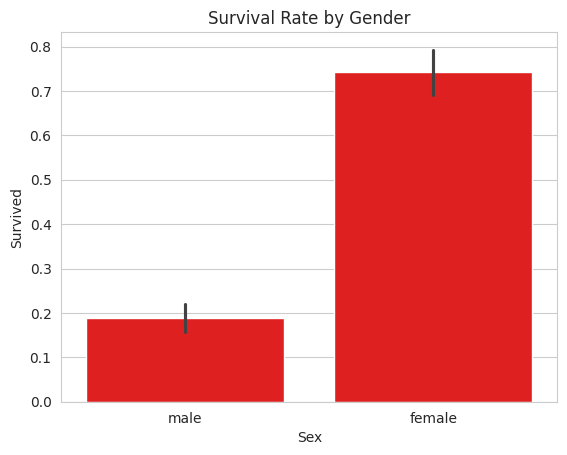

In [ ]:
# Plot for Survival by gender
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=data, color = "Red")
plt.title("Survival Rate by Gender")
plt.show()


5.2. Barplot for Survival by Embarked

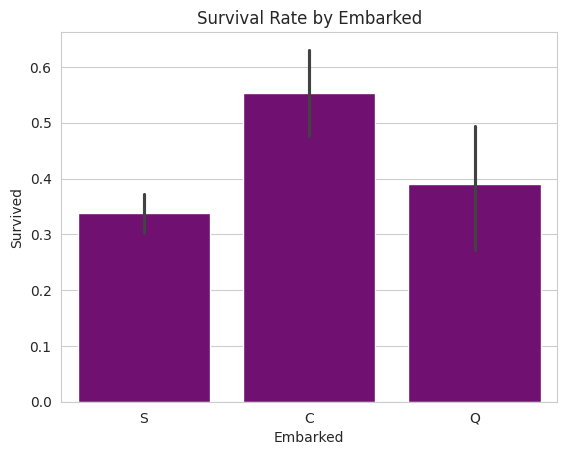

In [ ]:
# Plot for Survival by Embarked
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Embarked', y='Survived', data=data, color = "Purple")
plt.title("Survival Rate by Embarked")
plt.show()


5.3. Scatterplot for Age vs Fare (Survival Highlighted)

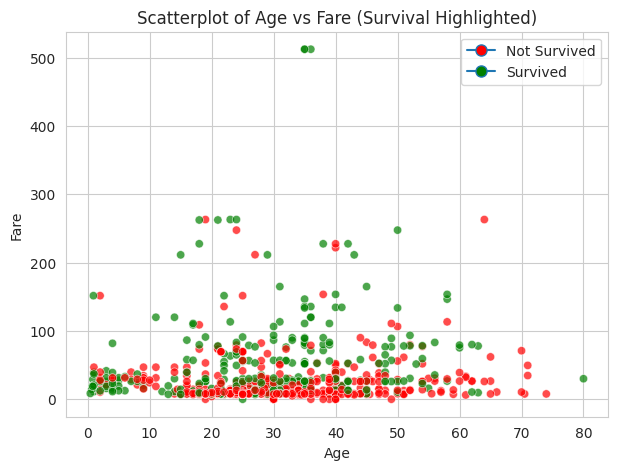

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

sns.set_style('whitegrid')

plt.figure(figsize=(7, 5))
sns.scatterplot(x=data['Age'], y=data['Fare'], hue=data['Survived'], palette={0: 'red', 1: 'green'}, alpha=0.7)

# Custom legend with matching colors and text
custom_legend = [
    Line2D([0], [0], marker='o', label='Not Survived', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', label='Survived', markerfacecolor='green', markersize=8)
]
# Plot titles and labels
plt.title('Scatterplot of Age vs Fare (Survival Highlighted)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(handles=custom_legend)
plt.show()




5.4. Barplot for Survival by Passenger Class

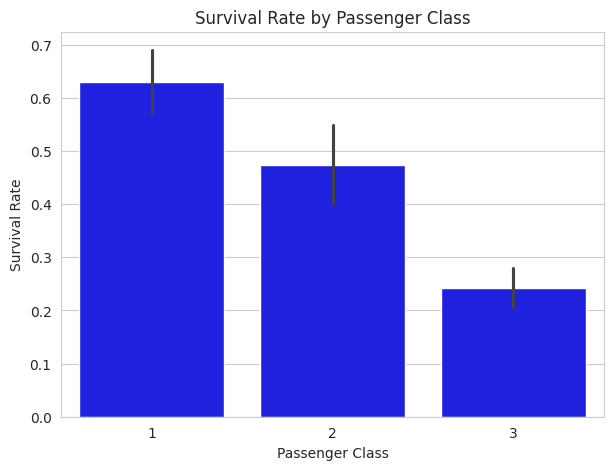

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Plot titles and labels
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=data, color="blue")
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


**6. Feature Engineering**

6.1. Dropping Irrelevant Features


In [ ]:
# Drop unnecessary columns
data_model = data.drop(columns=["PassengerId", "Ticket"])

6.2. Inspecting DataFrame Columns

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

6.3. Encoding Categorical Variables


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
data_model['Sex'] = LabelEncoder().fit_transform(data_model['Sex'])
data_model['Embarked'] = LabelEncoder().fit_transform(data_model['Embarked'])

**7. Model Training and Performance Evaluation**

7.1. Data Splitting and Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = data_model.drop(columns=["Survived","Name"])
y = data_model["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

7.2. Model Accuracy Assessment

In [ ]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Performance: \n\nAccuracy: {accuracy * 100:.2f}%")
print(f"The model correctly predicts survival {accuracy * 100:.0f} out of 100 times.\n\n")

Model Performance: 

Accuracy: 82.12%
The model correctly predicts survival 82 out of 100 times.




7.3. Classification Report

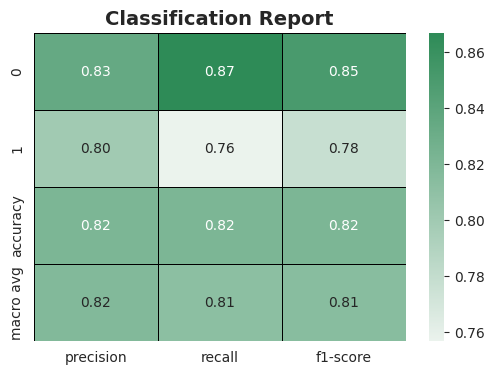

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert classification report to DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-1, :-1],  annot=True,  fmt=".2f",
            cmap=sns.light_palette("seagreen", as_cmap=True),
            linewidths=.5, linecolor='black')

plt.title("Classification Report", fontsize=14, weight='bold')
plt.show()


7.4. Confusion Matrix Visualization

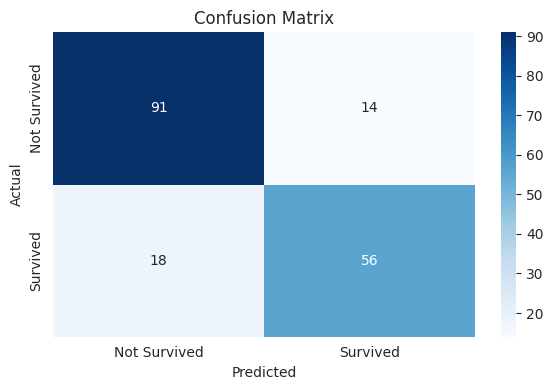

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


7.5. Feature Correlation Analysis (Heatmap)

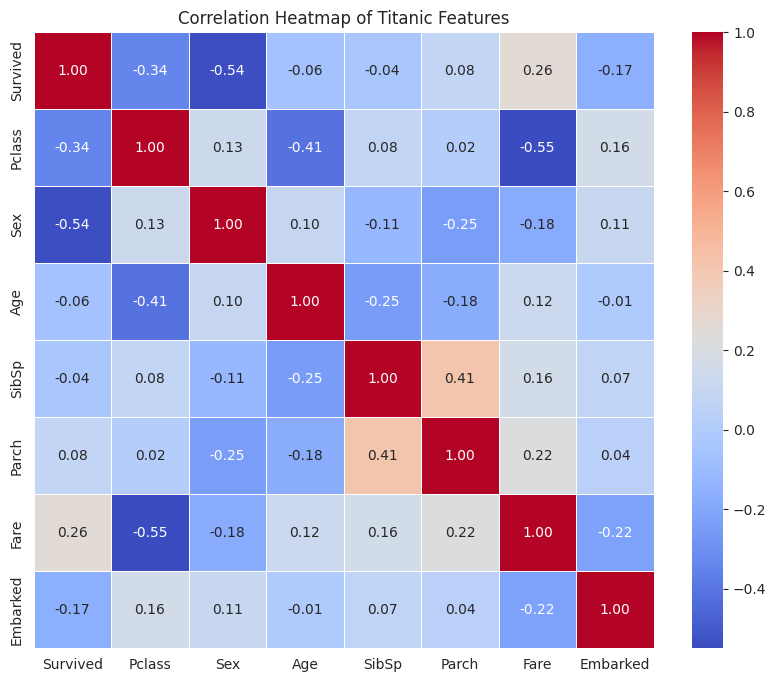

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Name' column and any other non-numeric columns not needed for correlation
# (e.g., 'Ticket' if it exists and is not numeric, though it's less common to correlate)
data_for_correlation = data_model.drop(columns=['Name', 'Ticket'], errors='ignore')

correlation_matrix = data_for_correlation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Titanic Features')
plt.show()

**8. Boosting Model Performance (Accuracy)**

8.1. Calculating Family Size


In [ ]:
data_model['FamilySize'] = data_model['SibSp'] + data_model['Parch'] + 1


8.2. Identifying Alone Passengers

In [ ]:
#Creating 'IsAlone' based on 'FamilySize'
data_model['IsAlone'] = (data_model['FamilySize'] == 1).astype(int)


8.3. Creating Age Bins


In [ ]:
#Categorizing 'Age' into 'AgeRange' for better insights
import pandas as pd
data_model['AgeRange'] = pd.cut(data_model['Age'],   bins=[0, 12, 18, 30, 45, 60, 100],
        labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])



8.4. Extracting and Encoding Titles

In [ ]:
# Normalizing 'Name' titles and converting them to numerical format

data_model['Title'] = data_model['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data_model['Title'] = data_model['Title'].replace(['Mlle', 'Ms'], 'Miss')
data_model['Title'] = data_model['Title'].replace(['Mme', 'Lady'], 'Mrs')
data_model['Title'] = data_model['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Sir', 'Don', 'Jonkheer', 'Capt'], 'Rare')

from sklearn.preprocessing import LabelEncoder
data_model['Title'] = LabelEncoder().fit_transform(data_model['Title'])


8.5. Barplot for Survival Rate by Age Group

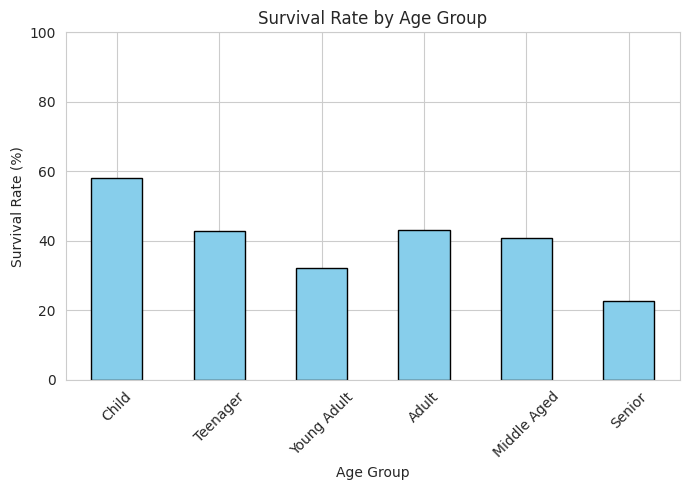

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Group total and survived counts by AgeRange
total_by_age = data_model.groupby('AgeRange', observed=True)['Survived'].count()
survived_by_age = data_model.groupby('AgeRange', observed=True)['Survived'].sum()


# Calculate survival rate
survival_rate = (survived_by_age / total_by_age) * 100

plt.figure(figsize=(7, 5))
survival_rate.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Age Group")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8.6. Final Model Accuracy Check


In [ ]:
#Assessing the effectiveness of feature engineering on model performance

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = data_model.drop(columns=["Survived","Name","AgeRange"])
y = data_model["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Performance: \n\nAccuracy: {accuracy * 100:.2f}%")
print(f"The model correctly predicts survival {accuracy * 100:.0f} out of 100 times.\n\n")

#This will increase the accuracy

Model Performance: 

Accuracy: 84.36%
The model correctly predicts survival 84 out of 100 times.




In [ ]:
print("--- Titanic Survival Prediction Task Complete ---")